# Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

In [1]:
import numpy as np
from scipy.spatial import distance
from math import sin, exp
import re

In [138]:
d = {}
m = np.ones((22, 254))

#Сначала создадим словарь, ключами которого будут все слова, встречающиеся в тексте
with open('sentences.txt') as inf:
    for line in inf:
        line = line.strip().lower()
        t = re.split('[^a-z]', line)
        print(list(filter(None, t)))
        for x in list(filter(None, t)):
            d[x] = [0]*22
            
#Теперь заполним словарь
count = 0 #Номер предложения
with open('sentences.txt') as inf:
    for line in inf:
        line = line.strip().lower()
        t = re.split('[^a-z]', line)
        for x in list(filter(None, t)):
            d[x][count] = list(filter(None, t)).count(x)
        count+=1

#Заполняем массив
for i in range(0,22):
    for j in range(0, 254):
        m[i,j] = d[list(d.keys())[j]][i]

#Массив с косинусными расстояниями
cos_dist = []
cos_dist_copy = []
for i in range(1,22):
    cos_dist.append(distance.cosine(m[0, :], m[i,:]))
    cos_dist_copy.append(distance.cosine(m[0, :], m[i,:]))
#Два минимальных расстояния
print(cos_dist)

res_1 = cos_dist.index(min(cos_dist))+1
cos_dist.remove(min(cos_dist))
res_2 = cos_dist_copy.index(min(cos_dist))+1

print(res_1, res_2)

#Запись в файл
with open('submission-1.txt', 'w') as ouf:
    ouf.write(str(res_1)+" ")
    ouf.write(str(res_2))
    





['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']
['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']
['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']
['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 't

## Задача 2: аппроксимация функции

In [2]:
from pylab import *

In [3]:
def f(x):   
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

[3.25221687 3.23947913 3.22682049 ... 0.65169236 0.64346668 0.63522142]


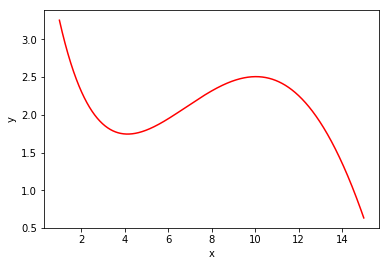

In [9]:
x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
xlabel('x')
ylabel('y')
show()

[[ 1  1]
 [ 1 15]]
[[3.25221687]
 [0.63522142]]
[[ 3.43914511]
 [-0.18692825]]


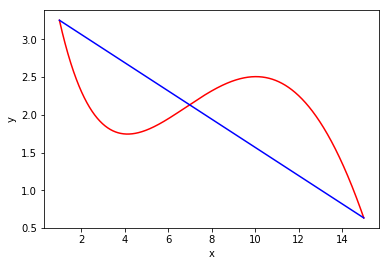

In [5]:
#Первая степень многочлена
x_1 = 1
x_2 = 15
F = np.array([f(x_1), f(x_2)]).reshape(2,1)
X = np.array([[1, x_1], [1, x_2]])
print(X)
print(F)
W = np.linalg.solve(X, F)
print(W)

def predict_model(x):
    return W[0]+W[1]*x

#Рисуем
x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()


[[ 3.32512949]
 [-0.06531159]
 [-0.00760104]]


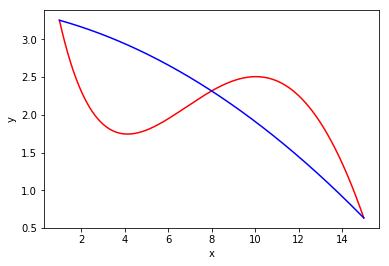

In [6]:
#Вторая степень многочлена
x_1 = 1
x_2 = 8
x_3 = 15

F = np.array([f(x_1), f(x_2), f(x_3)])
X = np.array([[1, x_1, x_1**2], [1, x_2, x_2**2], [1, x_3, x_3**2]])
W = np.linalg.solve(X, F[:, np.newaxis])
print(W)

def predict_model(x):
    return W[0]+W[1]*x+W[2]*(x**2)

x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()



[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


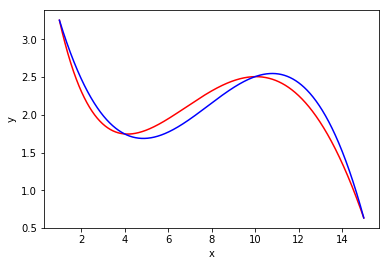

In [7]:
#Третья степень многочлена
x_1 = 1
x_2 = 4
x_3 = 10
x_4 = 15

F = np.array([f(x_1), f(x_2), f(x_3), f(x_4)])
X = np.array([[1, x_1, x_1**2, x_1**3], [1, x_2, x_2**2, x_2**3], [1, x_3, x_3**2, x_3**3], [1, x_4, x_4**2, x_4**3]])
W = np.linalg.solve(X, F[:, np.newaxis])
print(W)

def predict_model(x):
    return W[0]+W[1]*x+W[2]*(x**2)+W[3]*(x**3)

x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()



In [8]:
#Запись в файл
print(W.shape)
with open('submission-2.txt', 'w') as ouf:
    ouf.write(str(W[0][0])+" ")
    ouf.write(str(W[1][0])+" ")
    ouf.write(str(W[2][0])+" ")
    ouf.write(str(W[3][0]))

(4, 1)
